<a href="https://colab.research.google.com/github/rchlrolle/data_645/blob/main/Lab6_Data_645.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 ---Module 1
### Author: Rachel Rolle

1. Data Loading and Preprocessing:

In [4]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [9]:
from tensorflow.keras.datasets import imdb
imdb = (train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

2. Model Building and Compilation:

In [6]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(2, activation="softmax")
])

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

3. Model Training and Validation

In [16]:
history = model.fit(x_train, y_train, epochs=6)

Epoch 1/6
782/782 [==============================] - 9s 12ms/step - loss: 0.2741 - accuracy: 0.8898
Epoch 2/6
782/782 [==============================] - 8s 10ms/step - loss: 0.2658 - accuracy: 0.8942
Epoch 3/6
782/782 [==============================] - 6s 8ms/step - loss: 0.2586 - accuracy: 0.8975
Epoch 4/6
782/782 [==============================] - 8s 10ms/step - loss: 0.2519 - accuracy: 0.9000
Epoch 5/6
782/782 [==============================] - 6s 8ms/step - loss: 0.2456 - accuracy: 0.9037
Epoch 6/6
782/782 [==============================] - 8s 10ms/step - loss: 0.2400 - accuracy: 0.9056


4. Model Evaluation:

When evaluating my training model, it appears that there is not overfitting occuring. The valuation loss is supposed to be lower than the loss because this is the training data portion. Everything looks ideal, and I would not change anything.

In [13]:
history = model.fit(x_train, y_train, epochs=6,
                    validation_data=(x_test,y_test))

Epoch 1/6
782/782 [==============================] - 15s 17ms/step - loss: 0.6776 - accuracy: 0.6060 - val_loss: 0.6615 - val_accuracy: 0.6740
Epoch 2/6
782/782 [==============================] - 10s 13ms/step - loss: 0.6341 - accuracy: 0.7256 - val_loss: 0.6063 - val_accuracy: 0.7532
Epoch 3/6
782/782 [==============================] - 9s 12ms/step - loss: 0.5686 - accuracy: 0.7818 - val_loss: 0.5399 - val_accuracy: 0.7891
Epoch 4/6
782/782 [==============================] - 12s 16ms/step - loss: 0.5017 - accuracy: 0.8072 - val_loss: 0.4796 - val_accuracy: 0.8115
Epoch 5/6
782/782 [==============================] - 10s 13ms/step - loss: 0.4472 - accuracy: 0.8269 - val_loss: 0.4353 - val_accuracy: 0.8248
Epoch 6/6
782/782 [==============================] - 10s 13ms/step - loss: 0.4068 - accuracy: 0.8396 - val_loss: 0.4033 - val_accuracy: 0.8358


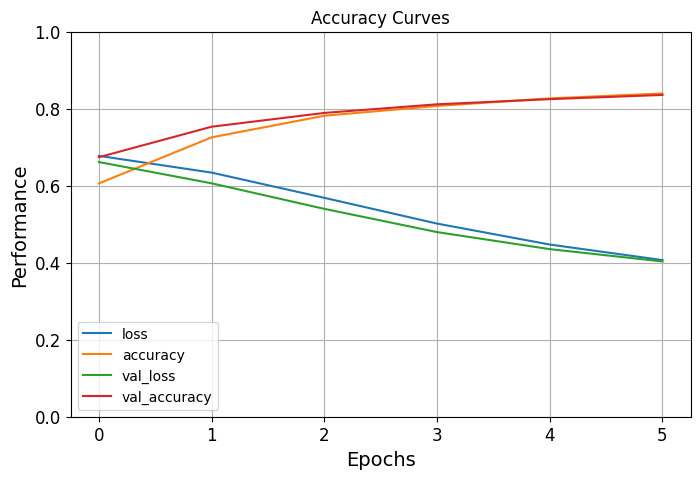

In [14]:
# Plot accuracy curves for training and validation sets
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.title("Accuracy Curves")
plt.show()


5. Model Refinement and Retraining

Eventhough my model looks great and there is no overfitting occuring, this tasks ask us to change the model. I decided to adjust the epochs and to my surprise allowing the model to read through the data two additional times, this lead to overfitting. By adjusting this measurement, I got a better picture of how sensitive my model can be to these hyperparameters.

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(2, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(x_train, y_train, epochs=8)

Epoch 1/8
782/782 [==============================] - 6s 8ms/step - loss: 0.3132 - accuracy: 0.8753
Epoch 2/8
782/782 [==============================] - 7s 9ms/step - loss: 0.3002 - accuracy: 0.8804
Epoch 3/8
782/782 [==============================] - 6s 8ms/step - loss: 0.2893 - accuracy: 0.8854
Epoch 4/8
782/782 [==============================] - 7s 9ms/step - loss: 0.2795 - accuracy: 0.8899
Epoch 5/8
782/782 [==============================] - 6s 8ms/step - loss: 0.2707 - accuracy: 0.8942
Epoch 6/8
782/782 [==============================] - 7s 9ms/step - loss: 0.2630 - accuracy: 0.8963
Epoch 7/8
782/782 [==============================] - 6s 8ms/step - loss: 0.2557 - accuracy: 0.9002
Epoch 8/8
782/782 [==============================] - 7s 9ms/step - loss: 0.2491 - accuracy: 0.9041


In [16]:
history = model.fit(x_train, y_train, epochs=8,
                    validation_data=(x_test,y_test))

Epoch 1/8
782/782 [==============================] - 15s 18ms/step - loss: 0.6695 - accuracy: 0.6098 - val_loss: 0.6397 - val_accuracy: 0.6866
Epoch 2/8
782/782 [==============================] - 10s 13ms/step - loss: 0.5944 - accuracy: 0.7438 - val_loss: 0.5569 - val_accuracy: 0.7665
Epoch 3/8
782/782 [==============================] - 11s 15ms/step - loss: 0.5117 - accuracy: 0.7984 - val_loss: 0.4870 - val_accuracy: 0.8018
Epoch 4/8
782/782 [==============================] - 14s 18ms/step - loss: 0.4477 - accuracy: 0.8224 - val_loss: 0.4352 - val_accuracy: 0.8240
Epoch 5/8
782/782 [==============================] - 11s 14ms/step - loss: 0.4024 - accuracy: 0.8396 - val_loss: 0.4012 - val_accuracy: 0.8357
Epoch 6/8
782/782 [==============================] - 10s 13ms/step - loss: 0.3705 - accuracy: 0.8516 - val_loss: 0.3770 - val_accuracy: 0.8446
Epoch 7/8
782/782 [==============================] - 10s 12ms/step - loss: 0.3468 - accuracy: 0.8614 - val_loss: 0.3597 - val_accuracy: 0.8517

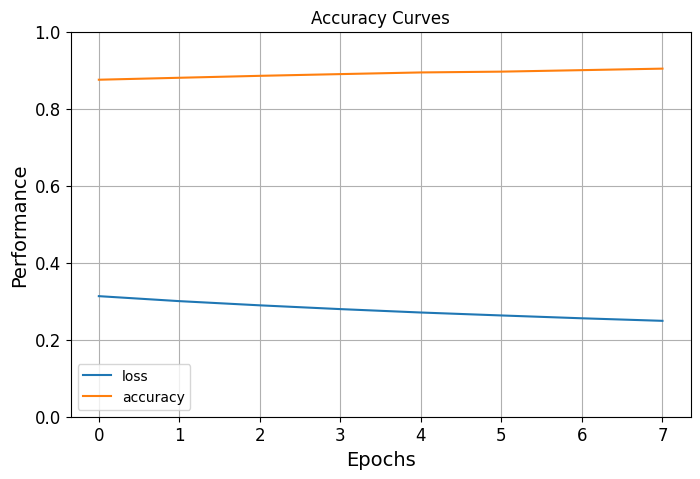

In [18]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.title("Accuracy Curves")
plt.show()